In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\Вся РФ\Вторичка РФ.xlsx")

In [10]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Кол-во комнат          557 non-null    float64
 1   Локация                557 non-null    object 
 2   total_price            557 non-null    int64  
 3   total_area             557 non-null    float64
 4   flats_count            557 non-null    int64  
 5   Средневзвешенная цена  557 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 26.2+ KB


In [11]:
agg

,Кол-во комнат,Локация,total_price,total_area,flats_count,Средневзвешенная цена
0,0.0,Алтайский край,769374973,5125.48,215,150107.887066
1,0.0,Амурская область,779649160,4044.40,152,192772.515083
2,0.0,Архангельская область,297634900,2490.02,95,119531.128264
3,0.0,Астраханская область,63749000,474.53,17,134341.348281
4,0.0,Белгородская область,667297856,5120.33,151,130323.212762
...,...,...,...,...,...,...
552,6.0,Ульяновская область,1850000,146.00,1,12671.232877
553,6.0,Ханты-Мансийский автономный округ,37500000,892.80,3,42002.688172
554,6.0,Челябинская область,95250000,630.20,3,151142.494446
555,6.0,Чувашская Республика,8999000,147.00,1,61217.687075


In [3]:
df = df.dropna(subset=['Локация', 'Кол-во комнат', 'Цена', 'Площадь'])
df = df[df['Площадь'] > 0]

In [9]:
agg = (
    df
    .groupby(['Кол-во комнат', 'Локация'], as_index=False)
    .agg(
        total_price=('Цена', 'sum'),
        total_area=('Площадь', 'sum'),
        flats_count=('Цена', 'count')
    )
)

agg['Средневзвешенная цена'] = agg['total_price'] / agg['total_area']

In [20]:
import plotly.express as px

fig = px.bar(
    agg,
    x='Средневзвешенная цена',
    y='Локация',
    animation_frame='Кол-во комнат',
    orientation='h',
    title='Средневзвешенная цена по регионам',
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [32]:
agg_region = (
    df
    .groupby('Локация', as_index=False)
    .agg(
        total_price=('Цена', 'sum'),
        total_area=('Площадь', 'sum'),
        flats_count=('Цена', 'count')
    )
)

agg_region['Средневзвешенная цена'] = (
    agg_region['total_price'] / agg_region['total_area']
)

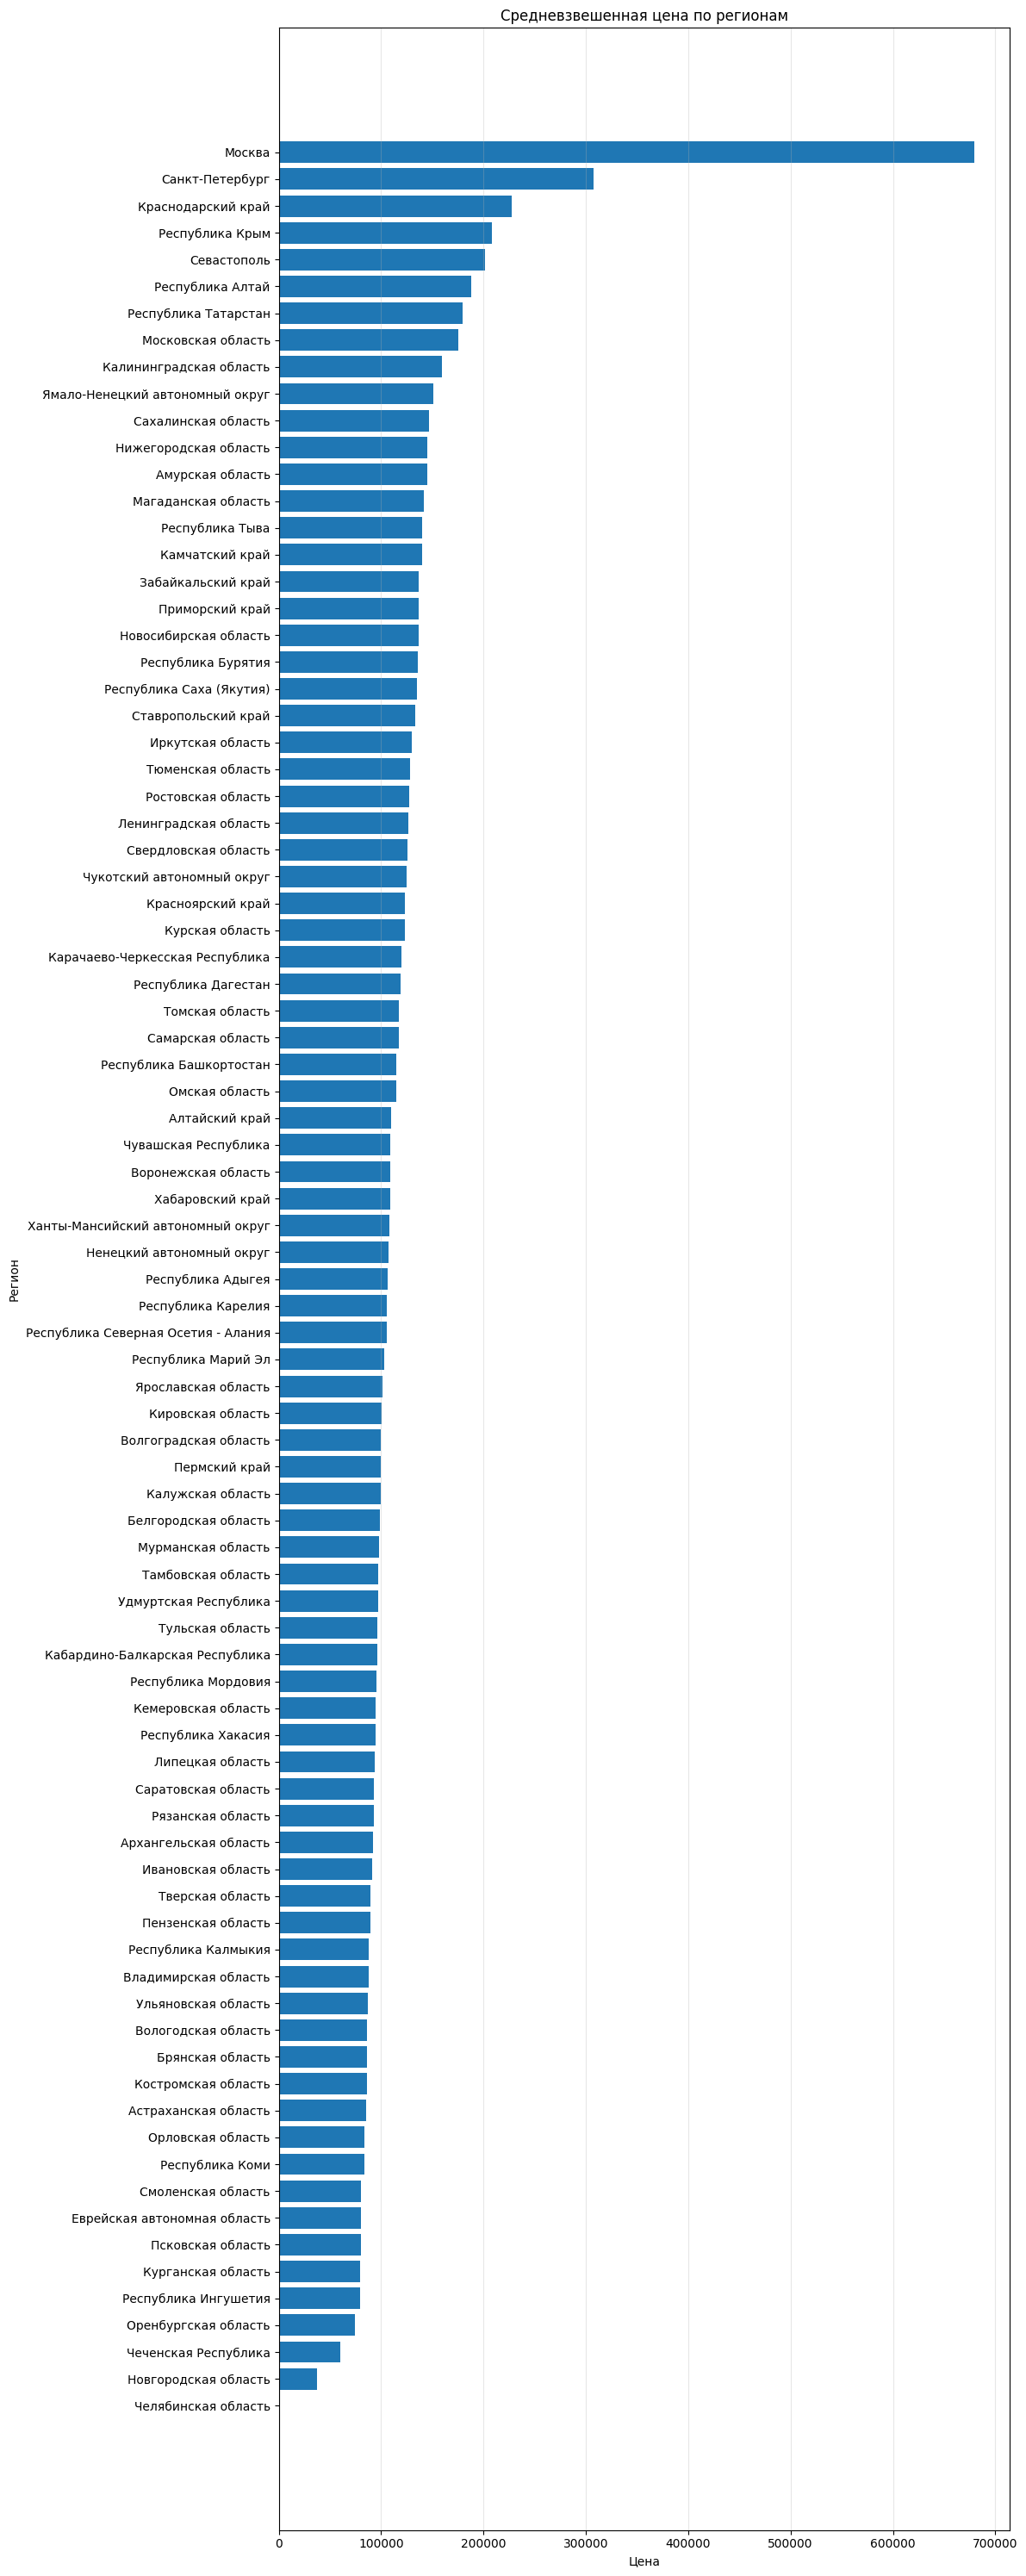

In [33]:
agg_region = agg_region.sort_values(
    'Средневзвешенная цена',
    ascending=False
)

plt.figure(figsize=(12, 30))

plt.barh(
    agg_region['Локация'],
    agg_region['Средневзвешенная цена']
)

plt.title('Средневзвешенная цена по регионам')
plt.xlabel('Цена')
plt.ylabel('Регион')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()